# **Building ML Algorithm To Predict Which Existing Borrowers Will Fail Repayment**

### DATA EXTRACTION

Importing necessary libraries for data cleaning and exploration :

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Printing some text to test if Python is working properly

In [344]:
print("Welcome Not A Loan Shark Sdn. Bhd.! :)")


Welcome Not A Loan Shark Sdn. Bhd.! :)


Importing data set from a .xlsx file

In [345]:
data_source_path = '../src/loan_default_data.xlsx'

df = pd.read_excel(data_source_path)

Creating a function to help the process of checking our data shape :

In [346]:
def checkDataShape(df):
    data_shape = df.shape
    total_rows = data_shape[0]
    total_columns = data_shape[1]
    print(f'Total number of rows: {total_rows}')
    print(f'Total number of columns: {total_columns}')

Trying to see the nature or shape of the dataset

In [347]:
checkDataShape(df)

Total number of rows: 38480
Total number of columns: 37


In [348]:
df.head()

,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,...,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date,last_payment_amnt,next_payment_date,last_credit_pull_date,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,2007-01-01,0.00,2007-01-01,2007-01-01,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,2013-08-01,2016-06-01,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,NaT,2012-03-01,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,NaT,2014-03-01,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,NaT,2016-06-01,0


As you can see above, this is the raw data set from .xlsx file. The first column has the column name = 'Unnamed: 0' which is by default the indexing from the .xlsx file. This column will have no use in our Machine Learning Building process.This needs to be dropped as follow :

In [349]:
print("Before deleting the index column from raw .xlsx file:")
checkDataShape(df)
df.head()

Before deleting the index column from raw .xlsx file:
Total number of rows: 38480
Total number of columns: 37


,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,...,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date,last_payment_amnt,next_payment_date,last_credit_pull_date,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,2007-01-01,0.00,2007-01-01,2007-01-01,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,2013-08-01,2016-06-01,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,NaT,2012-03-01,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,NaT,2014-03-01,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,NaT,2016-06-01,0


In [350]:
df = df.iloc[:, 1:]

checkDataShape(df)
print("\nAfter deleting the column:")
df.head()

Total number of rows: 38480
Total number of columns: 36

After deleting the column:


,id,member_id,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,...,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date,last_payment_amnt,next_payment_date,last_credit_pull_date,repay_fail
0,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,...,1.0,0.000000,0.00,0.00,0.00,2007-01-01,0.00,2007-01-01,2007-01-01,1
1,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,...,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,2013-08-01,2016-06-01,0
2,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,...,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,NaT,2012-03-01,1
3,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,...,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,NaT,2014-03-01,0
4,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,...,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,NaT,2016-06-01,0


### DATA CLEANING

Next, I want to see the nature of the data type in each column. From here, I want to further see which data needs to be cleaned and to be processed right.

In [351]:
df.dtypes

id                                        int64
member_id                                 int64
loan_amount                             float64
funded_amount                           float64
funded_amount_investors                 float64
term                                     object
interest_rate                           float64
installment                             float64
employment_length                        object
home_ownership                           object
annual_income                           float64
verification_status                      object
issue_date                       datetime64[ns]
loan_status                              object
purpose                                  object
zip_code                                 object
address_state                            object
debt_to_income_ratio                    float64
no_delinquency_2yrs                     float64
earliest_credit_line             datetime64[ns]
inquiries_last_6mths                    

I want to check if our data has duplicated rows in this early stage of data cleaning. If it has any, then it needs to be dropped accordingly.

In [352]:
duplicate_rows = df.duplicated().sum()

print(f"Total number of duplicate rows: {duplicate_rows}")

Total number of duplicate rows: 0


It is a good thing that we dont have any duplicate rows in our data. Next, I will be dropping the 'id' and 'member_id' columns from our data set. This is because these 2 fields would not have any impact on whether a client can pay back their loan or not.

In [353]:
df.drop('id', axis = 1, inplace = True)
df.drop('member_id', axis = 1, inplace = True)

checkDataShape(df)
df.head()

Total number of rows: 38480
Total number of columns: 34


,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,...,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date,last_payment_amnt,next_payment_date,last_credit_pull_date,repay_fail
0,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,...,1.0,0.000000,0.00,0.00,0.00,2007-01-01,0.00,2007-01-01,2007-01-01,1
1,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,...,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,2013-08-01,2016-06-01,0
2,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,...,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,NaT,2012-03-01,1
3,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,...,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,NaT,2014-03-01,0
4,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,...,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,NaT,2016-06-01,0


As we can see above, now the total number of columns is 34. The inital raw data set contained 37 columns in total. By far yet, we have dropped 3 columns :
1. Default Indexing Column from .xlsx file (Unnamed)
2. 'id' column
3. 'member_id' column

All these 3 columns are considered to be unimportant as it will not contribute anything to predict as whether a client can pay back their loan or not.
______________________________________________________________________________________

Next, I want to see again the nature of our data :

In [354]:
df.dtypes

loan_amount                             float64
funded_amount                           float64
funded_amount_investors                 float64
term                                     object
interest_rate                           float64
installment                             float64
employment_length                        object
home_ownership                           object
annual_income                           float64
verification_status                      object
issue_date                       datetime64[ns]
loan_status                              object
purpose                                  object
zip_code                                 object
address_state                            object
debt_to_income_ratio                    float64
no_delinquency_2yrs                     float64
earliest_credit_line             datetime64[ns]
inquiries_last_6mths                    float64
months_since_last_delinquency           float64
no_open_accounts                        

From the result above, I want to dive deeper to see the columns that have Categorical and Numerical data. I want to further verify if their data type fits with the context that the data brings.

Creating a function to check for Categorical vs Numerical data :

In [355]:
def extract_categorical_numerical_cols(df):
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    numerical_columns = [col for col in df.columns if df[col].dtype != 'object']
    
    print("Categorical columns:")
    for idx, col in enumerate(categorical_columns, start=1):
        print(f"{idx}. {col}")
        
    print("\nNumerical columns:")
    for idx, col in enumerate(numerical_columns, start=1):
        print(f"{idx}. {col}")

    return categorical_columns, numerical_columns

In [356]:
categorical_columns, numerical_columns = extract_categorical_numerical_cols(df)

Categorical columns:
1. term
2. employment_length
3. home_ownership
4. verification_status
5. loan_status
6. purpose
7. zip_code
8. address_state
9. revolving_utillization

Numerical columns:
1. loan_amount
2. funded_amount
3. funded_amount_investors
4. interest_rate
5. installment
6. annual_income
7. issue_date
8. debt_to_income_ratio
9. no_delinquency_2yrs
10. earliest_credit_line
11. inquiries_last_6mths
12. months_since_last_delinquency
13. no_open_accounts
14. public_records
15. revolving_balance
16. no_total_account
17. total_payment
18. total_payment_investors
19. total_received_principal
20. total_received_interest
21. last_payment_date
22. last_payment_amnt
23. next_payment_date
24. last_credit_pull_date
25. repay_fail


Above is the list of columns distinguished by their type. I can see that all the context is fit for the numerical data based on their column names. However, for Catgorical data, I want to go deeper to check and see if the data inside is correct within their narratives.

#### CATEGORICAL DATA

In [357]:
df.loc[:2, categorical_columns]

,term,employment_length,home_ownership,verification_status,loan_status,purpose,zip_code,address_state,revolving_utillization
0,36 months,< 1 year,RENT,Not Verified,Charged Off,major_purchase,000xx,ZZ,“0.00%”
1,36 months,4 years,RENT,Not Verified,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,0.213
2,36 months,4 years,RENT,Not Verified,Charged Off,debt_consolidation,115xx,NY,0.999


In [358]:
for col in categorical_columns:
    print('{} has {} unique values'.format(col,df[col].unique()))
    print('\n')

term has ['36 months' '60 months'] unique values


employment_length has ['< 1 year' '4 years' '10+ years' nan '3 years' '5 years' '7 years'
 '2 years' '1 year' '6 years' '9 years' '8 years'] unique values


home_ownership has ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE'] unique values


verification_status has ['Not Verified' 'Verified' 'Source Verified'] unique values


loan_status has ['Charged Off' 'Does not meet the credit policy. Status:Fully Paid'
 'Fully Paid' 'Current'
 'Does not meet the credit policy. Status:Charged Off'
 'Late (31-120 days)' 'In Grace Period' 'Late (16-30 days)' 'Default'] unique values


purpose has ['major_purchase' 'other' 'debt_consolidation' 'credit_card'
 'small_business' 'medical' 'wedding' 'car' 'home_improvement'
 'educational' 'vacation' 'house' 'moving' 'renewable_energy'] unique values


zip_code has ['000xx' '487xx' '115xx' '751xx' '112xx' '352xx' '853xx' '658xx' '105xx'
 '630xx' '450xx' '959xx' '721xx' '775xx' '857xx' '530xx' '240xx' '242xx'
 '784x

From the unique values extracted above, I can see that the categorical data in our 9 columns is looking good. There is some cases that I need to check deeper for data cleaning which are :
1. employment_length : This column has a NaN (Not a number) unique value.
2. revolving_utillization : This column seems to be storing numerical data. However, because of some mismatch, it becomes string. For example, the unique value '0.00%' which is supposed to be a numeric 0.

##### 1. 'employment_length' column

In [359]:
df['employment_length'].unique()

array(['< 1 year', '4 years', '10+ years', nan, '3 years', '5 years',
       '7 years', '2 years', '1 year', '6 years', '9 years', '8 years'],
      dtype=object)

In [360]:
df['employment_length'].isna().sum()

993

In [361]:
df['employment_length'].isna().unique()

array([False,  True])

In [362]:

checkDataShape(df)

Total number of rows: 38480
Total number of columns: 34


In [363]:
df.dropna(subset=['employment_length'], inplace=True)

In [364]:
checkDataShape(df)

Total number of rows: 37487
Total number of columns: 34


In [365]:
df['employment_length'].isna().sum()

0

In [366]:
df['employment_length'].unique()

array(['< 1 year', '4 years', '10+ years', '3 years', '5 years',
       '7 years', '2 years', '1 year', '6 years', '9 years', '8 years'],
      dtype=object)

##### 2. 'revolving_utillization' column

In [367]:
df['revolving_utillization'].nunique()

1108

In [368]:
df['revolving_utillization_numeric'] = pd.to_numeric(df['revolving_utillization'], errors='coerce')


In [369]:
df.head()

,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,...,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date,last_payment_amnt,next_payment_date,last_credit_pull_date,repay_fail,revolving_utillization_numeric
0,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,...,0.000000,0.00,0.00,0.00,2007-01-01,0.00,2007-01-01,2007-01-01,1,NaN
1,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,...,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,2013-08-01,2016-06-01,0,0.213
2,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,...,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,NaT,2012-03-01,1,0.999
3,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,...,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,NaT,2014-03-01,0,0.472
4,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,...,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,NaT,2016-06-01,0,0.000


In [370]:
df.drop('revolving_utillization', axis = 1, inplace = True)

In [371]:
df['revolving_utillization_numeric'].isna().sum()

58

In [372]:

df = df.dropna(subset=['revolving_utillization_numeric'])

In [373]:
df['revolving_utillization_numeric'].isna().sum()

0

In [374]:
checkDataShape(df)

Total number of rows: 37429
Total number of columns: 34


##### Checking Label Distribution in Categorical Data

In [375]:
categorical_columns, numerical_columns = extract_categorical_numerical_cols(df)

Categorical columns:
1. term
2. employment_length
3. home_ownership
4. verification_status
5. loan_status
6. purpose
7. zip_code
8. address_state

Numerical columns:
1. loan_amount
2. funded_amount
3. funded_amount_investors
4. interest_rate
5. installment
6. annual_income
7. issue_date
8. debt_to_income_ratio
9. no_delinquency_2yrs
10. earliest_credit_line
11. inquiries_last_6mths
12. months_since_last_delinquency
13. no_open_accounts
14. public_records
15. revolving_balance
16. no_total_account
17. total_payment
18. total_payment_investors
19. total_received_principal
20. total_received_interest
21. last_payment_date
22. last_payment_amnt
23. next_payment_date
24. last_credit_pull_date
25. repay_fail
26. revolving_utillization_numeric


In [376]:
len(categorical_columns)

8

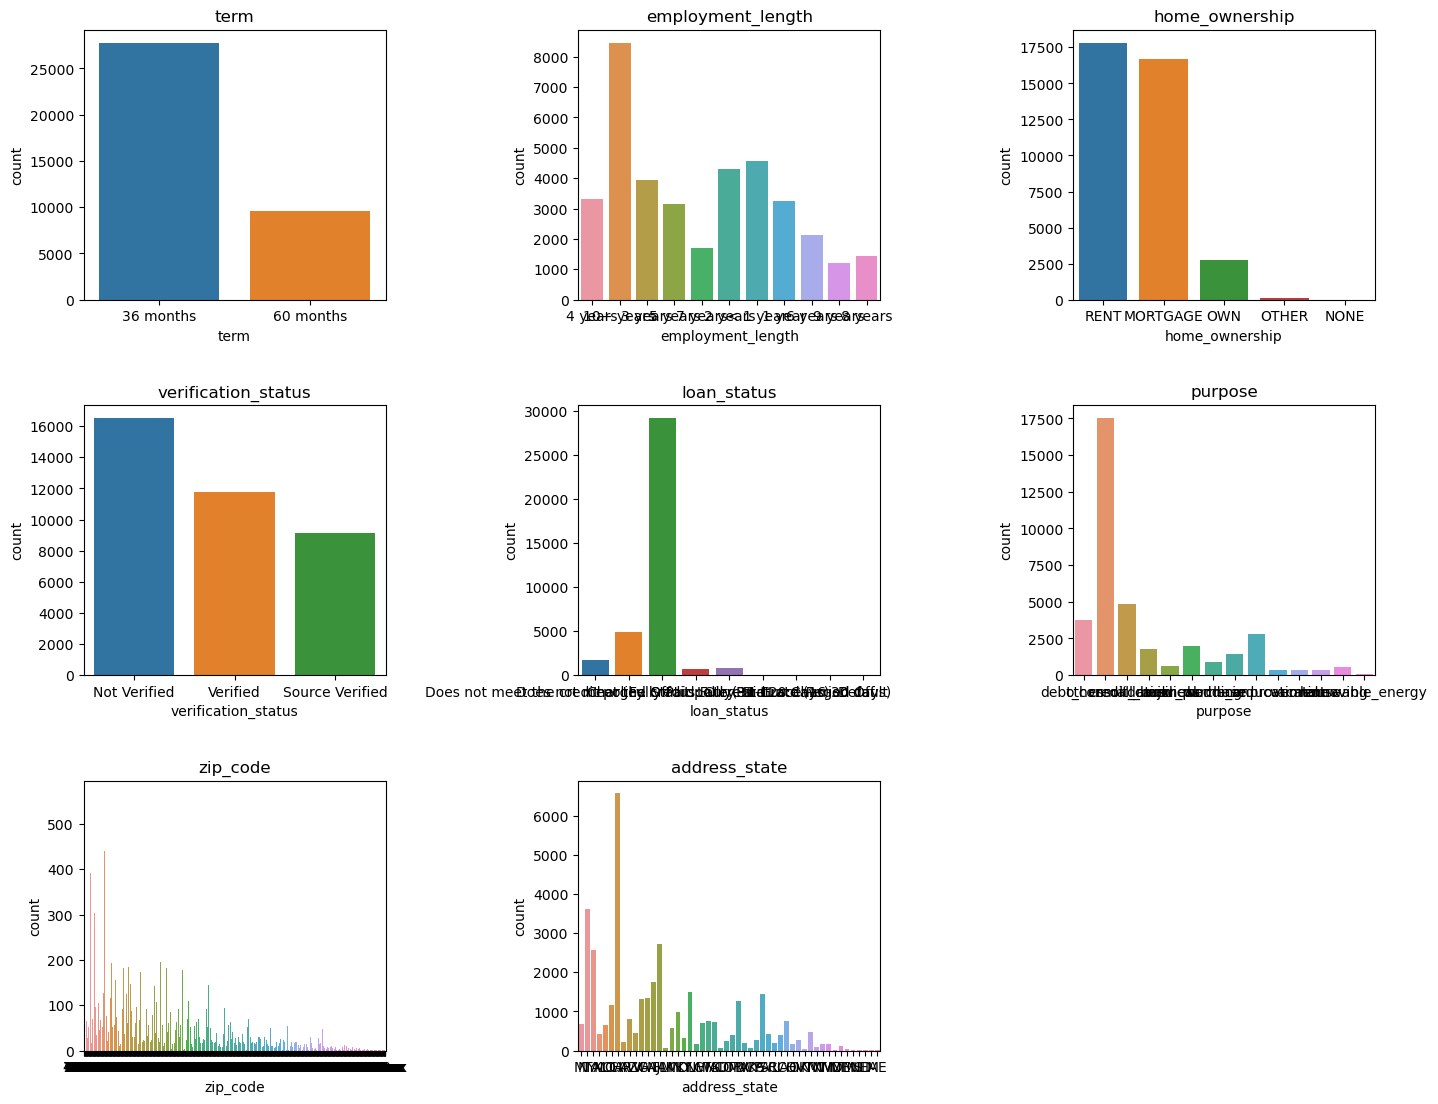

In [377]:
plt.figure(figsize=(15, 15))

for i, feature in enumerate(categorical_columns):
    ax = plt.subplot(4, 3, i + 1)
    sns.countplot(x=df[feature], ax=ax)
    plt.title(feature)

plt.tight_layout(pad=3.0)
plt.show()

#### Encoding Categorical Data to Numerical Value

In [378]:
label_encoder = LabelEncoder()

df['term_encoded'] = label_encoder.fit_transform(df['term'])

print(df[['term', 'term_encoded']].head(10))
df.drop(columns=['term'], inplace=True)

         term  term_encoded
1   36 months             0
2   36 months             0
3   36 months             0
4   36 months             0
5   36 months             0
7   36 months             0
8   60 months             1
9   60 months             1
10  36 months             0
11  36 months             0


In [379]:
checkDataShape(df)

Total number of rows: 37429
Total number of columns: 34


In [380]:
custom_mapping_empl_length = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}

df['employment_length_encoded'] = df['employment_length'].map(custom_mapping_empl_length)
print(df[['employment_length', 'employment_length_encoded']].head(10))
df.drop(columns=['employment_length'], inplace=True)

   employment_length  employment_length_encoded
1            4 years                          4
2            4 years                          4
3          10+ years                         10
4          10+ years                         10
5          10+ years                         10
7            3 years                          3
8            4 years                          4
9          10+ years                         10
10           4 years                          4
11           5 years                          5


In [381]:
checkDataShape(df)

Total number of rows: 37429
Total number of columns: 34


In [384]:
df = pd.concat([df, pd.get_dummies(df['home_ownership'], prefix='home')], axis=1)
df.drop(columns=['home_ownership'], inplace=True)
checkDataShape(df)
df.head()

KeyError: 'home_ownership'

In [385]:
df = pd.concat([df, pd.get_dummies(df['verification_status'], prefix='verification')], axis=1)
df.drop(columns=['verification_status'], inplace=True)
checkDataShape(df)
df.head()

Total number of rows: 37429
Total number of columns: 40


,loan_amount,funded_amount,funded_amount_investors,interest_rate,installment,annual_income,issue_date,loan_status,purpose,zip_code,...,term_encoded,employment_length_encoded,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,verification_Not Verified,verification_Source Verified,verification_Verified
1,2500.0,2500.0,2500.0,13.98,85.42,20004.0,2010-07-01,Does not meet the credit policy. Status:Fully ...,other,487xx,...,0,4,False,False,False,False,True,True,False,False
2,5000.0,5000.0,5000.0,15.95,175.67,59000.0,2010-06-01,Charged Off,debt_consolidation,115xx,...,0,4,False,False,False,False,True,True,False,False
3,7000.0,7000.0,7000.0,9.91,225.58,53796.0,2011-09-01,Fully Paid,other,751xx,...,0,10,True,False,False,False,False,True,False,False
4,2000.0,2000.0,2000.0,5.42,60.32,30000.0,2011-09-01,Fully Paid,debt_consolidation,112xx,...,0,10,False,False,False,False,True,True,False,False
5,3600.0,3600.0,3600.0,10.25,116.59,675048.0,2010-04-01,Does not meet the credit policy. Status:Fully ...,other,352xx,...,0,10,True,False,False,False,False,True,False,False


In [386]:
df = pd.concat([df, pd.get_dummies(df['loan_status'], prefix='loan')], axis=1)
df.drop(columns=['loan_status'], inplace=True)
checkDataShape(df)
df.head()

Total number of rows: 37429
Total number of columns: 48


,loan_amount,funded_amount,funded_amount_investors,interest_rate,installment,annual_income,issue_date,purpose,zip_code,address_state,...,verification_Verified,loan_Charged Off,loan_Current,loan_Default,loan_Does not meet the credit policy. Status:Charged Off,loan_Does not meet the credit policy. Status:Fully Paid,loan_Fully Paid,loan_In Grace Period,loan_Late (16-30 days),loan_Late (31-120 days)
1,2500.0,2500.0,2500.0,13.98,85.42,20004.0,2010-07-01,other,487xx,MI,...,False,False,False,False,False,True,False,False,False,False
2,5000.0,5000.0,5000.0,15.95,175.67,59000.0,2010-06-01,debt_consolidation,115xx,NY,...,False,True,False,False,False,False,False,False,False,False
3,7000.0,7000.0,7000.0,9.91,225.58,53796.0,2011-09-01,other,751xx,TX,...,False,False,False,False,False,False,True,False,False,False
4,2000.0,2000.0,2000.0,5.42,60.32,30000.0,2011-09-01,debt_consolidation,112xx,NY,...,False,False,False,False,False,False,True,False,False,False
5,3600.0,3600.0,3600.0,10.25,116.59,675048.0,2010-04-01,other,352xx,AL,...,False,False,False,False,False,True,False,False,False,False


In [387]:
df = pd.concat([df, pd.get_dummies(df['purpose'], prefix='purpose')], axis=1)
df.drop(columns=['purpose'], inplace=True)
checkDataShape(df)
df.head()

Total number of rows: 37429
Total number of columns: 61


,loan_amount,funded_amount,funded_amount_investors,interest_rate,installment,annual_income,issue_date,zip_code,address_state,debt_to_income_ratio,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
1,2500.0,2500.0,2500.0,13.98,85.42,20004.0,2010-07-01,487xx,MI,19.86,...,False,False,False,False,False,True,False,False,False,False
2,5000.0,5000.0,5000.0,15.95,175.67,59000.0,2010-06-01,115xx,NY,19.57,...,False,False,False,False,False,False,False,False,False,False
3,7000.0,7000.0,7000.0,9.91,225.58,53796.0,2011-09-01,751xx,TX,10.80,...,False,False,False,False,False,True,False,False,False,False
4,2000.0,2000.0,2000.0,5.42,60.32,30000.0,2011-09-01,112xx,NY,3.60,...,False,False,False,False,False,False,False,False,False,False
5,3600.0,3600.0,3600.0,10.25,116.59,675048.0,2010-04-01,352xx,AL,1.55,...,False,False,False,False,False,True,False,False,False,False


In [388]:
len(df['zip_code'].unique())

830

In [389]:
freq = df['zip_code'].value_counts(normalize=True)

In [390]:
print(freq)

zip_code
100xx    0.015149
606xx    0.013091
945xx    0.013065
112xx    0.012931
070xx    0.011756
           ...   
673xx    0.000027
884xx    0.000027
408xx    0.000027
375xx    0.000027
838xx    0.000027
Name: proportion, Length: 830, dtype: float64


In [391]:
df['zip_code_freq_encoded'] = df['zip_code'].map(freq)
df.drop(columns=['zip_code'], inplace=True)
checkDataShape(df)
df.head()

Total number of rows: 37429
Total number of columns: 61


,loan_amount,funded_amount,funded_amount_investors,interest_rate,installment,annual_income,issue_date,address_state,debt_to_income_ratio,no_delinquency_2yrs,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_freq_encoded
1,2500.0,2500.0,2500.0,13.98,85.42,20004.0,2010-07-01,MI,19.86,0.0,...,False,False,False,False,True,False,False,False,False,0.000134
2,5000.0,5000.0,5000.0,15.95,175.67,59000.0,2010-06-01,NY,19.57,0.0,...,False,False,False,False,False,False,False,False,False,0.002966
3,7000.0,7000.0,7000.0,9.91,225.58,53796.0,2011-09-01,TX,10.80,3.0,...,False,False,False,False,True,False,False,False,False,0.001737
4,2000.0,2000.0,2000.0,5.42,60.32,30000.0,2011-09-01,NY,3.60,0.0,...,False,False,False,False,False,False,False,False,False,0.012931
5,3600.0,3600.0,3600.0,10.25,116.59,675048.0,2010-04-01,AL,1.55,0.0,...,False,False,False,False,True,False,False,False,False,0.001737


In [392]:
len(df['address_state'].unique())

50

In [393]:
freq_address_state = df['address_state'].value_counts(normalize=True)
print(freq_address_state)

address_state
CA    0.175639
NY    0.096369
FL    0.072671
TX    0.068877
NJ    0.047156
IL    0.039782
PA    0.038847
GA    0.035641
VA    0.035133
MA    0.033530
OH    0.031393
MD    0.026477
AZ    0.021588
WA    0.020412
CO    0.020038
NC    0.019290
CT    0.018782
MI    0.018034
MO    0.017446
MN    0.015362
NV    0.012584
WI    0.012263
SC    0.011542
AL    0.011248
OR    0.010874
LA    0.010820
KY    0.008256
OK    0.007427
KS    0.006946
UT    0.006626
AR    0.006118
DC    0.005183
RI    0.004916
NM    0.004836
HI    0.004355
NH    0.004275
WV    0.004168
DE    0.003206
MT    0.002191
AK    0.002004
WY    0.001977
SD    0.001496
VT    0.001389
TN    0.000802
MS    0.000641
IN    0.000508
IA    0.000321
NE    0.000267
ID    0.000214
ME    0.000080
Name: proportion, dtype: float64


In [394]:
df['address_state_freq_encoded'] = df['address_state'].map(freq_address_state)
df.drop(columns=['address_state'], inplace=True)
checkDataShape(df)
df.head()

Total number of rows: 37429
Total number of columns: 61


,loan_amount,funded_amount,funded_amount_investors,interest_rate,installment,annual_income,issue_date,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_freq_encoded,address_state_freq_encoded
1,2500.0,2500.0,2500.0,13.98,85.42,20004.0,2010-07-01,19.86,0.0,2005-08-01,...,False,False,False,True,False,False,False,False,0.000134,0.018034
2,5000.0,5000.0,5000.0,15.95,175.67,59000.0,2010-06-01,19.57,0.0,1994-04-01,...,False,False,False,False,False,False,False,False,0.002966,0.096369
3,7000.0,7000.0,7000.0,9.91,225.58,53796.0,2011-09-01,10.80,3.0,1998-03-01,...,False,False,False,True,False,False,False,False,0.001737,0.068877
4,2000.0,2000.0,2000.0,5.42,60.32,30000.0,2011-09-01,3.60,0.0,1975-01-01,...,False,False,False,False,False,False,False,False,0.012931,0.096369
5,3600.0,3600.0,3600.0,10.25,116.59,675048.0,2010-04-01,1.55,0.0,1998-04-01,...,False,False,False,True,False,False,False,False,0.001737,0.011248


In [395]:
categorical_columns, numerical_columns = extract_categorical_numerical_cols(df)

Categorical columns:

Numerical columns:
1. loan_amount
2. funded_amount
3. funded_amount_investors
4. interest_rate
5. installment
6. annual_income
7. issue_date
8. debt_to_income_ratio
9. no_delinquency_2yrs
10. earliest_credit_line
11. inquiries_last_6mths
12. months_since_last_delinquency
13. no_open_accounts
14. public_records
15. revolving_balance
16. no_total_account
17. total_payment
18. total_payment_investors
19. total_received_principal
20. total_received_interest
21. last_payment_date
22. last_payment_amnt
23. next_payment_date
24. last_credit_pull_date
25. repay_fail
26. revolving_utillization_numeric
27. term_encoded
28. employment_length_encoded
29. home_MORTGAGE
30. home_NONE
31. home_OTHER
32. home_OWN
33. home_RENT
34. verification_Not Verified
35. verification_Source Verified
36. verification_Verified
37. loan_Charged Off
38. loan_Current
39. loan_Default
40. loan_Does not meet the credit policy. Status:Charged Off
41. loan_Does not meet the credit policy. Status:Ful

#### Numerical Data

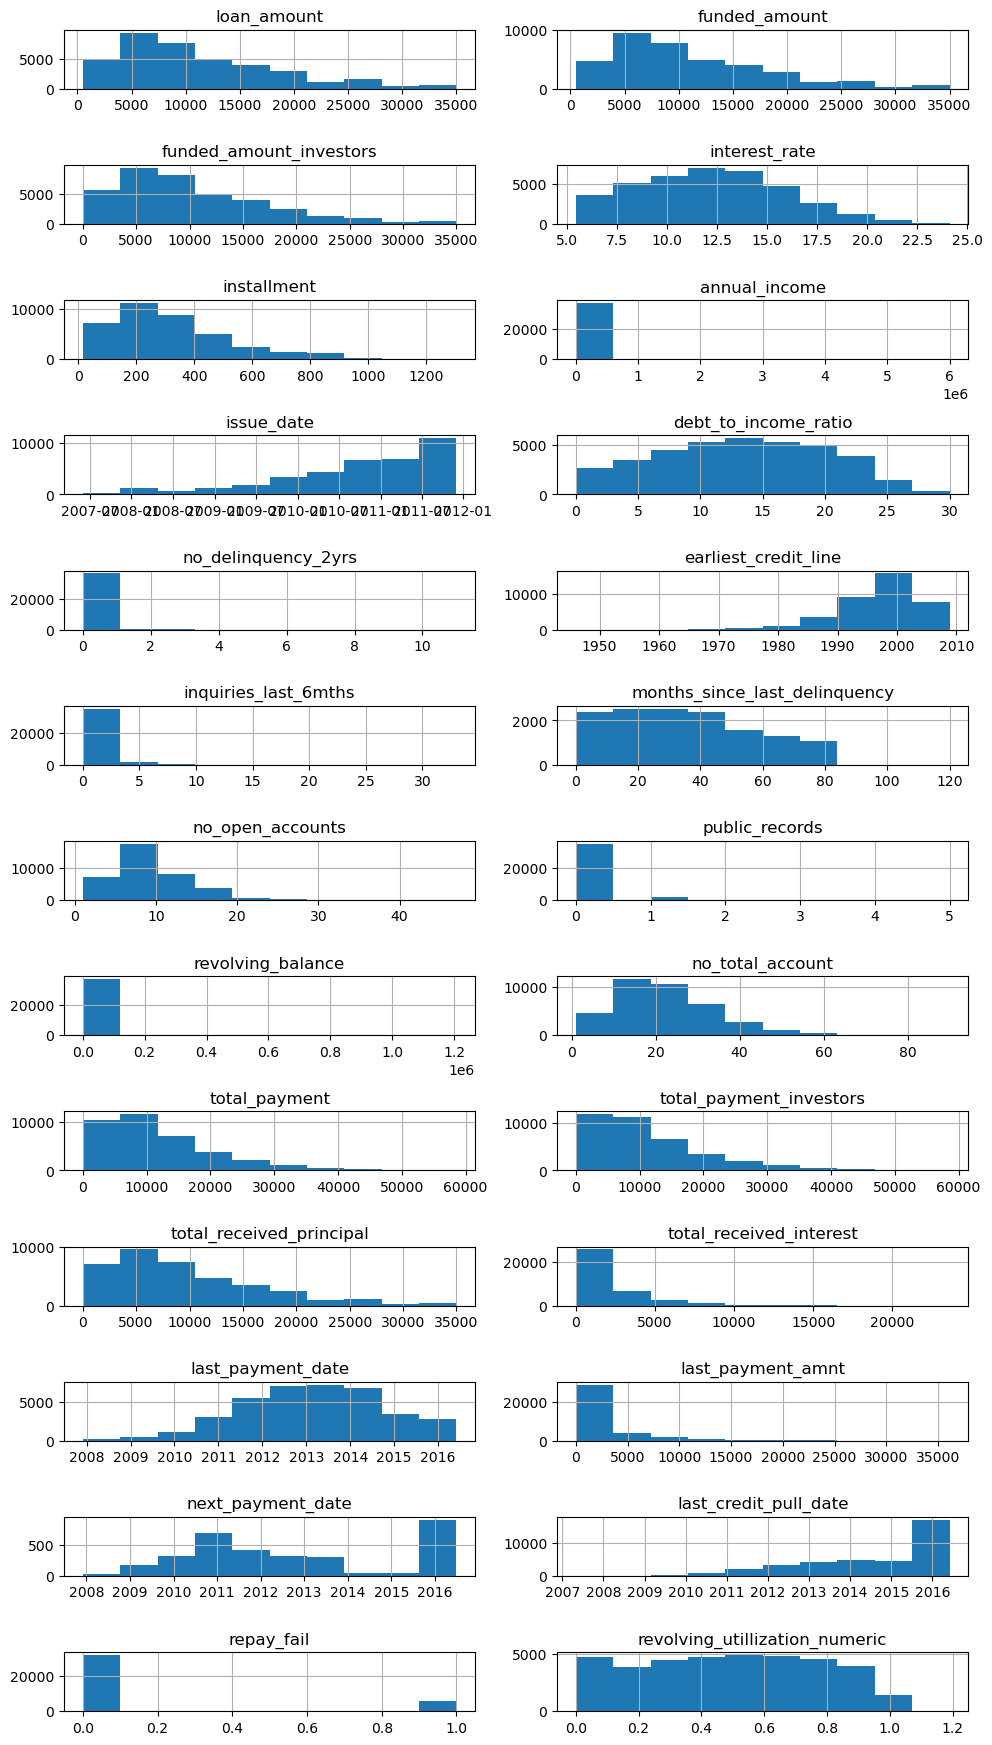

In [262]:
plt.figure(figsize=(10,20))

for i, feature in enumerate(numerical_columns):
    plt.subplot(15,2,i+1)
    df[feature].hist()
    plt.title(feature)

plt.tight_layout(pad=1.0)  
plt.show()

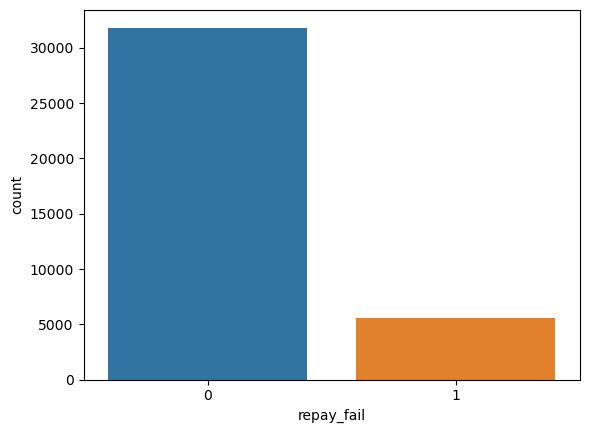

In [265]:
sns.countplot(x=df['repay_fail'])
plt.show()

#### Checking Co-relation In Data

In [396]:
df.corr()

,loan_amount,funded_amount,funded_amount_investors,interest_rate,installment,annual_income,issue_date,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_freq_encoded,address_state_freq_encoded
loan_amount,1.000000,0.981820,0.928345,0.290364,0.930834,0.274092,0.158753,0.061873,-0.033148,-0.202738,...,-0.098036,-0.054002,-0.074568,-0.142876,-0.012970,0.078702,-0.070541,-0.029954,0.028951,0.012870
funded_amount,0.981820,1.000000,0.946131,0.293137,0.956217,0.270050,0.165301,0.061591,-0.034433,-0.196015,...,-0.098390,-0.054086,-0.075332,-0.143655,-0.012502,0.073671,-0.070439,-0.028079,0.029643,0.012716
funded_amount_investors,0.928345,0.946131,1.000000,0.277643,0.888085,0.251603,0.326840,0.067580,-0.045763,-0.177223,...,-0.087831,-0.050232,-0.070068,-0.140869,-0.014011,0.045236,-0.065272,-0.026439,0.025122,0.015264
interest_rate,0.290364,0.293137,0.277643,1.000000,0.269224,0.052923,0.015458,0.121264,0.155783,0.102692,...,-0.075988,-0.018476,-0.013846,-0.014620,-0.009241,0.061769,-0.032848,-0.008214,0.019383,0.009619
installment,0.930834,0.956217,0.888085,0.269224,1.000000,0.276055,0.080945,0.051368,-0.020582,-0.181761,...,-0.101219,-0.056609,-0.075003,-0.140989,-0.012654,0.077535,-0.070892,-0.026688,0.048491,0.025645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
purpose_small_business,0.078702,0.073671,0.045236,0.061769,0.077535,0.028089,-0.030097,-0.069089,0.011900,-0.011794,...,-0.052987,-0.029601,-0.026914,-0.074771,-0.010560,1.000000,-0.021032,-0.034930,0.005123,-0.001237
purpose_vacation,-0.070541,-0.070439,-0.065272,-0.032848,-0.070892,-0.012937,0.013368,-0.017023,0.002506,0.012478,...,-0.022478,-0.012557,-0.011418,-0.031720,-0.004480,-0.021032,1.000000,-0.014818,0.009139,0.014916
purpose_wedding,-0.029954,-0.028079,-0.026439,-0.008214,-0.026688,-0.004236,-0.005459,-0.026385,0.013631,0.047948,...,-0.037332,-0.020855,-0.018962,-0.052680,-0.007440,-0.034930,-0.014818,1.000000,0.036876,0.013932
zip_code_freq_encoded,0.028951,0.029643,0.025122,0.019383,0.048491,0.060865,-0.009279,-0.087931,-0.006927,0.051888,...,-0.017923,-0.006284,0.018941,0.000401,-0.005650,0.005123,0.009139,0.036876,1.000000,0.367505
